In [2]:
import matplotlib.pyplot as plot
import numpy as np


In [31]:
#DATA GENERATION
#length in millimeters
heights = [i * 0.5 for i in range(60)] #arrays of height and width
widths = [5 + i * 5 for i in range(3)]

alpha_steps = 100
alpha_angle_arange = 20 #total degrees
alphas = [alpha_angle_arange*(i/alpha_steps)-(alpha_angle_arange/2) for i in range(alpha_steps+1)] #-15..+15 degrees

led_steps = 2000
led_angle_arange = 60
led_rays = [led_angle_arange*(i/led_steps)-(led_angle_arange/2) for i in range(led_steps+1)]

photo_width = 7
energy = 0.005

In [4]:
#ANGLE MAPPERS
betta_map = {-32:0.02, -31:0.06, -30:0.1, -29:0.13, -28:0.16, -27:0.19,
             -26:0.2, -25:0.23, -24:0.26, -23:0.29, -22:0.31, -21:0.33,
             -20:0.36, -19:0.39, -18:0.42, -17:0.45, -16:0.48, -15:0.5,
             -14:0.54, -13:0.57, -12:0.6, -11:0.62, -10:0.65, -9:0.68,
             -8:0.73, -7:0.77, -6:0.82, -5:0.9, -4:0.92, -3:0.94, -2:0.97,
             -1:0.99, 0:1, 32:0.02, 31:0.06, 30:0.1, 29:0.13, 28:0.16, 27:0.19,
             26:0.2, 25:0.23, 24:0.26, 23:0.29, 22:0.31, 21:0.33,
             20:0.36, 19:0.39, 18:0.42, 17:0.45, 16:0.48, 15:0.5,
             14:0.54, 13:0.57, 12:0.6, 11:0.62, 10:0.65, 9:0.68,
             8:0.73, 7:0.77, 6:0.82, 5:0.9, 4:0.92, 3:0.94, 2:0.97,
             1:0.99}
kappa_map = {-70:0.17, -69:0.19, -68:0.19, -67:0.21, -66:0.22, -65:0.24,
             -64:0.27, -63:0.29, -62:0.32, -61:0.34, -60:0.37, -59:0.4,
             -58:0.42, -57:0.44, -56:0.45, -55:0.47, -54:0.48, -53:0.50,
             -52:0.52, -51:0.53, -50:0.54, -49:0.55, -48:0.57, -47:0.58, 
             -46:0.6, -45:0.62, -44:0.63, -43:0.64, -42:0.65, -41:0.66,
             -40:0.67, -39:0.68, -38:0.69, -37:0.7, -36:0.71, -35:0.73,
             -34:0.74, -33:0.75, -32:0.76, -31:0.78, -30:0.79, -29:0.79,
             -28:0.8, -27:0.81, -26:0.82, -25:0.84, -24:0.85, -23:0.87,
             -22:0.88, -21:0.89, -20:0.9, -19:0.91, -18:0.92, -17:0.93,
             -16:0.93, -15:0.94, -14:0.95, -13:0.96, -12:0.96, -11:0.97,
             -10:0.97, -9:0.98, -8:0.98, -7:0.98, -6:0.98, -5:0.99, -4:0.99,
             -3:0.99, -2:0.99, -1:0.99, 0:1, 70:0.17, 69:0.19, 68:0.19,
             67:0.21, 66:0.22, 65:0.24, 64:0.27, 63:0.29, 62:0.32, 61:0.34,
             60:0.37, 59:0.4, 58:0.42, 57:0.44, 56:0.45, 55:0.47, 54:0.48,
             53:0.50, 52:0.52, 51:0.53, 50:0.54, 49:0.55, 48:0.57, 47:0.58,
             46:0.6, 45:0.62, 44:0.63, 43:0.64, 42:0.65, 41:0.66, 40:0.67,
             39:0.68, 38:0.69, 37:0.7, 36:0.71, 35:0.73, 34:0.74, 33:0.75,
             32:0.76, 31:0.78, 30:0.79, 29:0.79, 28:0.8, 27:0.81, 26:0.82,
             25:0.84, 24:0.85, 23:0.87, 22:0.88, 21:0.89, 20:0.9, 19:0.91,
             18:0.92, 17:0.93, 16:0.93, 15:0.94, 14:0.95, 13:0.96, 12:0.96,
             11:0.97, 10:0.97, 9:0.98, 8:0.98, 7:0.98, 6:0.98, 5:0.99, 4:0.99,
             3:0.99, 2:0.99, 1:0.99}

In [5]:
#SUPPORTING FUNCTIONS
def find_B(h, w, alpha):
    a = np.radians(alpha)
    ca = np.cos(a)
    sa = np.sin(a)
    B = np.arccos((h*ca**2-h*sa**2+h+2*w*sa*ca)/(np.sqrt(h**2*sa**4-2*h**2*sa**2+h**2*ca**4+2*h**2*ca**2+2*h**2*sa**2*ca**2+h**2+4*h*w*sa*ca+w**2*sa**4+w**2*ca**4+2*w**2*sa**2*ca**2)))
    return(np.degrees(B))

def find_kappa(alpha, betta):
    return(2*alpha + betta)

def find_koef(angle, mapping, accuracy = 0):
    a = round(angle, accuracy)
    if a in mapping.keys():
        return(mapping[a])
    else:
        return(0)
    
def find_width(h, alpha, betta):
    a = np.radians(alpha)
    b = np.radians(betta)
    w = (h*np.cos(a)*np.sin(2*a+2*b))/(np.cos(a+b)*np.cos(2*a+b))
    return(b)

def count_hitting_energy(h, w, p_len, alpha, led_rays, ray_energy, b_map = betta_map, k_map = kappa_map):
    #find max and min bettas for rays that hit photodiode
    max_betta = find_B(h, w+p_len/2, alpha)
    min_betta = find_B(h, w-p_len/2, alpha)
    #print(max_betta, min_betta)
    
    #find rays that hit diapasone
    hitting_rays = 0
    for ray in led_rays:
        if (max_betta > ray > min_betta):
            emitting_energy = find_koef(ray, b_map) * ray_energy
            #TODO: add surface energy absorption
            kappa = find_kappa(alpha, ray)
            receiving_energy = find_koef(kappa, k_map) 
            hitting_rays += receiving_energy * emitting_energy
    return(hitting_rays)
    
    
def print_angles(alp, bet, kap):
    for a,b,k in zip(alp,bet,kap):
        print("alpha: %.2f \t betta: %.2f \t kappa: %.2f" % (a,b,k))

0


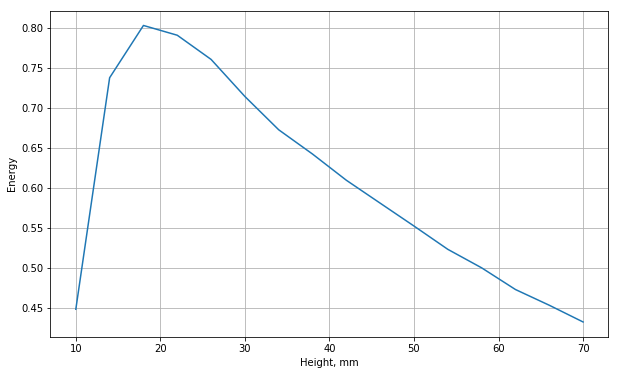

In [100]:
#Height VS Energy graphs
width = 10
#for alpha in alphas:
alpha = 0
print(alpha)
energies = [count_hitting_energy(h, width, photo_width, alpha, led_rays, energy) for h in heights]
plot.figure(figsize=(10, 6))
plot.plot(heights, energies)
plot.xlabel("Height, mm")
plot.ylabel("Energy")
plot.grid()
plot.show()

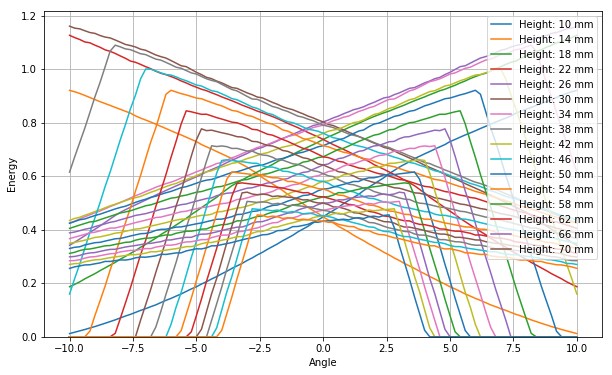

In [101]:
#Angle VS Energy by height
width = 10
heights = [10 + i*4 for i in range(16)]
legend = []
channels = []
plot.figure(figsize=(10, 6))
for max_height in heights:
    height_sweep = [(max_height * np.cos(np.radians(a)), a) for a in alphas]    
    energies = [count_hitting_energy(s[0], width, photo_width, s[1], led_rays, energy) for s in height_sweep]
    energies_2 = energies[::-1]
    channels.append((energies, energies_2))
    legend.append("Height: "+ str(max_height) +" mm")
    plot.plot(alphas, energies)
    plot.plot(alphas, energies_2)
plot.legend(legend, loc="best")
plot.xlabel("Angle")
plot.ylabel("Energy")
plot.grid()
plot.ylim(bottom=0)
plot.show()
    

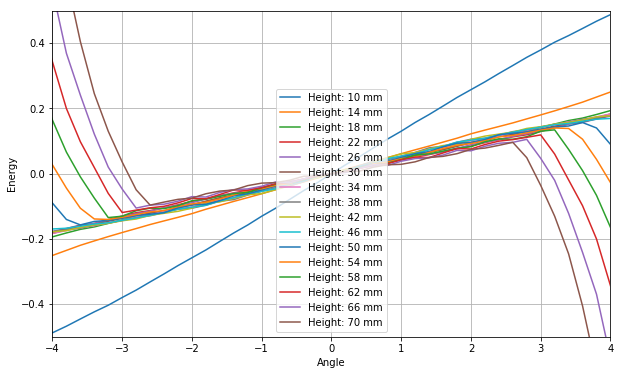

In [102]:
#different channels calculations
def summarize(list_of_2):
    l1 = list_of_2[0]    
    l2 = list_of_2[1]    
    summ = [v1 + v2 for v1, v2 in zip(l1, l2)]    
    return summ

def differnce(list_of_2):
    l1 = list_of_2[0]    
    l2 = list_of_2[1]    
    diff = [v1 - v2 for v1, v2 in zip(l1, l2)]    
    return diff

plot.figure(figsize=(10, 6))
for c in channels:
    sum = summarize(c)
    dif = differnce(c)
    k = [d/s for s, d in zip(sum, dif)]
    plot.plot(alphas, k)    
plot.legend(legend, loc="best")
plot.xlabel("Angle")
plot.ylabel("Energy")
plot.xlim(-4, 4)
plot.ylim(-0.5, 0.5)
plot.grid()
plot.show()

In [9]:
import scipy as sp
from scipy.optimize import fsolve

p = [0.594602883, 0.575543798, 0.5625, 0.535135135, 0.5, 0.46, 0.404878049, 0.330120482, 0.238095238, 0.141509434, 0.050691244, -0.013452915, -0.093333333, -0.151515152, -0.207048458, -0.255605381, -0.298165138, -0.352245863, -0.397590361, -0.44278607, -0.464646465, -0.503875969, -0.515789474, -0.544235925, -0.546308725,]
a = [i - 12 for i in range(25)]

#plot.scatter(p,a)
#plot.scatter(a,p)
p[-1]


-0.546308725

[ 0.69460288  0.68105832  0.66751376  0.6539692   0.64042464  0.62688007
  0.61333551  0.59979095  0.58624639  0.57270183  0.55915727  0.5456127
  0.53206814  0.51852358  0.50497902  0.49143446  0.4778899   0.46434533
  0.45080077  0.43725621  0.42371165  0.41016709  0.39662253  0.38307796
  0.3695334   0.35598884  0.34244428  0.32889972  0.31535516  0.30181059
  0.28826603  0.27472147  0.26117691  0.24763235  0.23408779  0.22054322
  0.20699866  0.1934541   0.17990954  0.16636498  0.15282042  0.13927585
  0.12573129  0.11218673  0.09864217  0.08509761  0.07155304  0.05800848
  0.04446392  0.03091936  0.0173748   0.00383024 -0.00971433 -0.02325889
 -0.03680345 -0.05034801 -0.06389257 -0.07743713 -0.0909817  -0.10452626
 -0.11807082 -0.13161538 -0.14515994 -0.1587045  -0.17224907 -0.18579363
 -0.19933819 -0.21288275 -0.22642731 -0.23997187 -0.25351644 -0.267061
 -0.28060556 -0.29415012 -0.30769468 -0.32123924 -0.33478381 -0.34832837
 -0.36187293 -0.37541749 -0.38896205 -0.40250661 -0.41

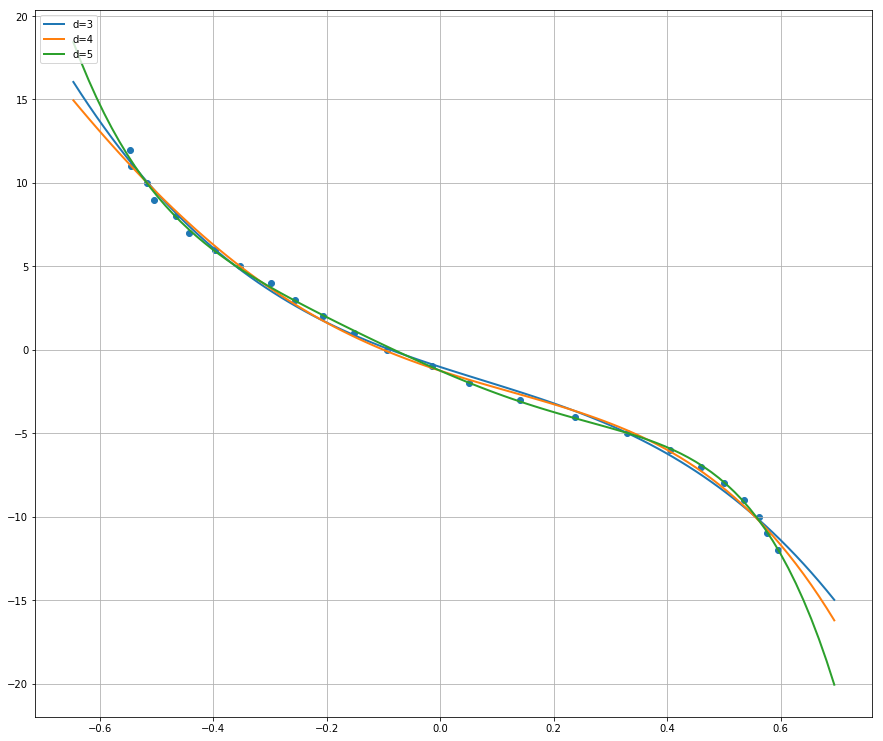

In [11]:
plot.figure(figsize=(15, 13))
offset = 0.1
legend = []
# аргументы для построения графиков моделей: исходный интервал + 60 дней
fx = sp.linspace(p[0]+offset, p[-1]-offset, 100)
print(fx)
for d in range(3, 6):
    # получаем параметры модели для полинома степени d
    fp, residuals, rank, sv, rcond = sp.polyfit(p, a, d, full=True)
    #print("Параметры модели: %s" % fp1)
    # функция-полином, если её напечатать, то увидите математическое выражение
    f = sp.poly1d(fp)    
    # рисуем график модельной функции
    plot.plot(fx, f(fx), linewidth=2)
    legend.append("d=%i" % f.order)
    f2 = f - 1000 # из полинома можно вычитать
    t = fsolve(f2, p[-1]) # ищем решение уравнения f2(x)=0, отплясывая от точки x[-1]
    print("-"*20)
    print("d = " + str(d))
    print("Полином %d-й степени:" % f.order)    
    print(f)
plot.scatter(p,a)
plot.legend(legend, loc="upper left")
plot.grid()
#plt.savefig('data.png', dpi=50)
plot.show()